In [ ]:
# Import the reqiured libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns; sns.set(style="ticks", color_codes=True)

In [ ]:
print("pandas version " + pd.__version__)
print("numpy version " + np.__version__)
print("matplotlib version " + matplotlib.__version__)
print("tensorflow version " + tf.__version__)

pandas version 1.3.5
numpy version 1.21.6
matplotlib version 3.2.2
tensorflow version 2.8.2


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from sklearn.metrics import mean_squared_error
from tensorflow.keras import backend as K

In [ ]:
## Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [ ]:
## Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## LOAD DATA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/REPfit/furnitures_v3.csv"
df = pd.read_csv(path)

In [ ]:
df.head()
df.dtypes

,category,price,link,other_colors,height,depth,width,materials,cost
0,Beds,895.0,https://www.ikea.com/sa/en/p/brimnes-bed-frame...,No,110,54,96,wood,644.40
1,Beds,2111.0,https://www.ikea.com/sa/en/p/platsa-bed-frame-...,No,43,40,140,steel,1646.58
2,Beds,995.0,https://www.ikea.com/sa/en/p/vattviken-armchai...,No,86,83,92,wood,756.20
3,Beds,575.0,https://www.ikea.com/sa/en/p/brimnes-bed-frame...,No,47,54,96,wood,442.75
4,Beds,920.0,https://www.ikea.com/sa/en/p/malm-bed-frame-hi...,Yes,15,59,196,wood,717.60


category         object
price           float64
link             object
other_colors     object
height            int64
depth             int64
width             int64
materials        object
cost            float64
dtype: object

In [ ]:
df = df.drop('link', axis=1)
df = df.drop('other_colors', axis=1)
df.head(10)

,category,price,height,depth,width,materials,cost
0,Beds,895.0,110,54,96,wood,644.40
1,Beds,2111.0,43,40,140,steel,1646.58
2,Beds,995.0,86,83,92,wood,756.20
3,Beds,575.0,47,54,96,wood,442.75
4,Beds,920.0,15,59,196,wood,717.60
5,Beds,575.0,20,54,146,wood,402.50
6,Beds,1495.0,18,70,89,steel,1196.00
7,Beds,670.0,15,59,105,wood,495.80
8,Beds,2600.5,43,40,143,steel,1976.38
9,Beds,399.0,78,85,128,steel,283.29


In [ ]:
df['category'].value_counts()
df.describe()

df['materials'].value_counts()
df.describe()

Chairs            213
Wardrobes         199
Tables & desks    103
Beds               78
Name: category, dtype: int64

,price,height,depth,width,cost
count,593.000000,593.000000,593.000000,593.000000,593.000000
mean,1346.674874,123.053963,60.283305,112.001686,1013.795752
std,1434.181643,72.747089,25.876409,71.327009,1081.877867
min,10.000000,2.000000,3.000000,4.000000,7.200000
25%,295.000000,75.000000,45.000000,52.000000,227.150000
50%,800.000000,95.000000,55.000000,90.000000,618.750000
75%,1870.000000,201.000000,66.000000,150.000000,1402.200000
max,9585.000000,281.000000,210.000000,420.000000,7668.000000


wood       342
steel      140
plastic    111
Name: materials, dtype: int64

,price,height,depth,width,cost
count,593.000000,593.000000,593.000000,593.000000,593.000000
mean,1346.674874,123.053963,60.283305,112.001686,1013.795752
std,1434.181643,72.747089,25.876409,71.327009,1081.877867
min,10.000000,2.000000,3.000000,4.000000,7.200000
25%,295.000000,75.000000,45.000000,52.000000,227.150000
50%,800.000000,95.000000,55.000000,90.000000,618.750000
75%,1870.000000,201.000000,66.000000,150.000000,1402.200000
max,9585.000000,281.000000,210.000000,420.000000,7668.000000


In [ ]:
df[df.isnull().any(axis=1)]

,category,price,height,depth,width,materials,cost


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   category   593 non-null    object 
 1   price      593 non-null    float64
 2   height     593 non-null    int64  
 3   depth      593 non-null    int64  
 4   width      593 non-null    int64  
 5   materials  593 non-null    object 
 6   cost       593 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 32.6+ KB


In [ ]:
df['category'].value_counts()

Chairs            213
Wardrobes         199
Tables & desks    103
Beds               78
Name: category, dtype: int64

## UNIVARIATE EXPLORATION

<Figure size 720x432 with 0 Axes>

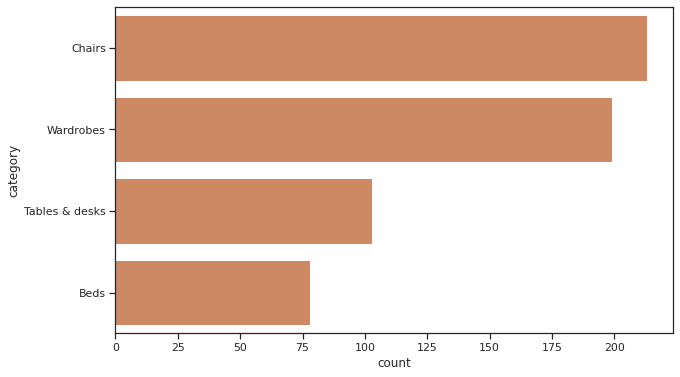

In [ ]:
order = df['category'].value_counts().index
color0 = sns.color_palette()[0]
color1 = sns.color_palette()[1]

plt.figure(figsize=[10, 6])


sns.countplot(data=df, y='category', order=order, color=color1)

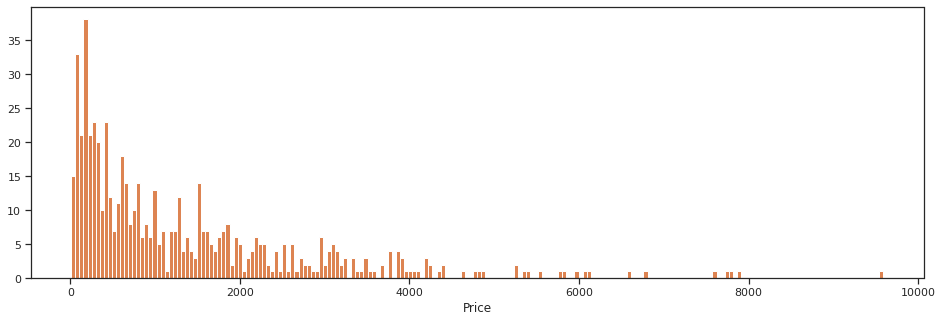

In [ ]:
binsize = 200

plt.figure(figsize=[16, 5])
plt.hist(data=df, x='price',bins=binsize, color=color1)

plt.xlabel('Price');

### Measurement vs Price

Text(0, 0.5, 'width')

Text(0.5, 0, '')

Text(0, 0.5, 'height')

Text(0.5, 0, '')

Text(0, 0.5, 'depth')

Text(0.5, 0, '')

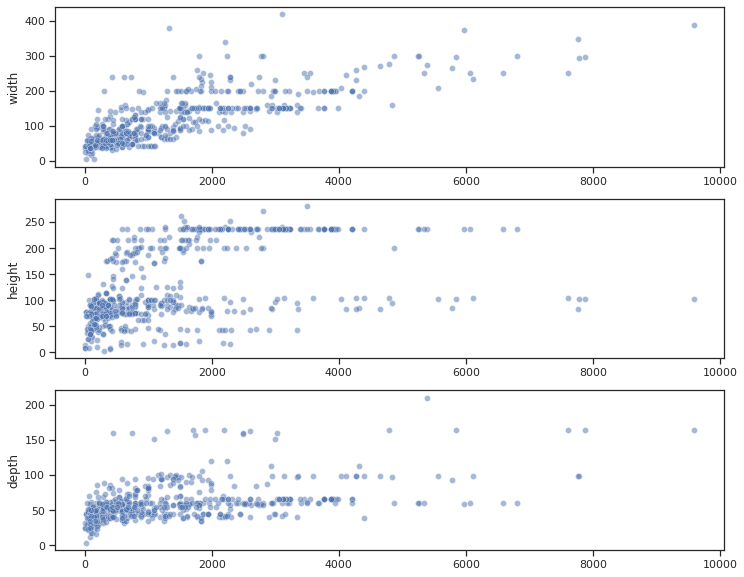

In [ ]:
binsize = 30

measures = ['width', 'height', 'depth']

fig, ax = plt.subplots(nrows=3, figsize = [12,10])
for index, measure in enumerate(measures): 
    sns.scatterplot(data=df, x="price", y=measure, alpha=0.5, ax = ax[index])
    ax[index].set_ylabel(measure);
    ax[index].set_xlabel('');

## CREATE DUMMY VARIABLES

In [ ]:
pd.get_dummies(df.category).sum()

Beds               78
Chairs            213
Tables & desks    103
Wardrobes         199
dtype: int64

In [ ]:
df = pd.concat([df, pd.get_dummies(df.category)], axis=1)
df.head()

,category,price,height,depth,width,materials,cost,Beds,Chairs,Tables & desks,Wardrobes
0,Beds,895.0,110,54,96,wood,644.40,1,0,0,0
1,Beds,2111.0,43,40,140,steel,1646.58,1,0,0,0
2,Beds,995.0,86,83,92,wood,756.20,1,0,0,0
3,Beds,575.0,47,54,96,wood,442.75,1,0,0,0
4,Beds,920.0,15,59,196,wood,717.60,1,0,0,0


In [ ]:
df = df.drop('category', axis=1)
df.head(20)

,price,height,depth,width,materials,cost,Beds,Chairs,Tables & desks,Wardrobes
0,895.0,110,54,96,wood,644.40,1,0,0,0
1,2111.0,43,40,140,steel,1646.58,1,0,0,0
2,995.0,86,83,92,wood,756.20,1,0,0,0
3,575.0,47,54,96,wood,442.75,1,0,0,0
4,920.0,15,59,196,wood,717.60,1,0,0,0
5,575.0,20,54,146,wood,402.50,1,0,0,0
6,1495.0,18,70,89,steel,1196.00,1,0,0,0
7,670.0,15,59,105,wood,495.80,1,0,0,0
8,2600.5,43,40,143,steel,1976.38,1,0,0,0
9,399.0,78,85,128,steel,283.29,1,0,0,0


In [ ]:
pd.get_dummies(df.materials).sum()

plastic    111
steel      140
wood       342
dtype: int64

In [ ]:
df = pd.concat([df, pd.get_dummies(df.materials)], axis=1)
df.head()

,price,height,depth,width,materials,cost,Beds,Chairs,Tables & desks,Wardrobes,plastic,steel,wood
0,895.0,110,54,96,wood,644.40,1,0,0,0,0,0,1
1,2111.0,43,40,140,steel,1646.58,1,0,0,0,0,1,0
2,995.0,86,83,92,wood,756.20,1,0,0,0,0,0,1
3,575.0,47,54,96,wood,442.75,1,0,0,0,0,0,1
4,920.0,15,59,196,wood,717.60,1,0,0,0,0,0,1


In [ ]:
df = df.drop('materials', axis=1)
df.head(20)

# price = 745.0
# heigh = 77
# depth = 50
# width = 49
# beds = 0
# chair = 1
# tables & desk = 0
# wardrobes = 0
# plastic = 1
# steel = 0
# wood = 0

,price,height,depth,width,cost,Beds,Chairs,Tables & desks,Wardrobes,plastic,steel,wood
0,895.0,110,54,96,644.40,1,0,0,0,0,0,1
1,2111.0,43,40,140,1646.58,1,0,0,0,0,1,0
2,995.0,86,83,92,756.20,1,0,0,0,0,0,1
3,575.0,47,54,96,442.75,1,0,0,0,0,0,1
4,920.0,15,59,196,717.60,1,0,0,0,0,0,1
5,575.0,20,54,146,402.50,1,0,0,0,0,0,1
6,1495.0,18,70,89,1196.00,1,0,0,0,0,1,0
7,670.0,15,59,105,495.80,1,0,0,0,0,0,1
8,2600.5,43,40,143,1976.38,1,0,0,0,0,1,0
9,399.0,78,85,128,283.29,1,0,0,0,0,1,0


In [ ]:
df.head(593)

,price,height,depth,width,cost,Beds,Chairs,Tables & desks,Wardrobes,plastic,steel,wood
0,895.0,110,54,96,644.400,1,0,0,0,0,0,1
1,2111.0,43,40,140,1646.580,1,0,0,0,0,1,0
2,995.0,86,83,92,756.200,1,0,0,0,0,0,1
3,575.0,47,54,96,442.750,1,0,0,0,0,0,1
4,920.0,15,59,196,717.600,1,0,0,0,0,0,1
5,575.0,20,54,146,402.500,1,0,0,0,0,0,1
6,1495.0,18,70,89,1196.000,1,0,0,0,0,1,0
7,670.0,15,59,105,495.800,1,0,0,0,0,0,1
8,2600.5,43,40,143,1976.380,1,0,0,0,0,1,0
9,399.0,78,85,128,283.290,1,0,0,0,0,1,0


In [ ]:
df.describe()

,price,height,depth,width,cost,Beds,Chairs,Tables & desks,Wardrobes,plastic,steel,wood
count,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000
mean,1346.674874,123.053963,60.283305,112.001686,1013.795752,0.131535,0.359191,0.173693,0.335582,0.187184,0.236088,0.576728
std,1434.181643,72.747089,25.876409,71.327009,1081.877867,0.338269,0.480168,0.379165,0.472592,0.390388,0.425035,0.494495
min,10.000000,2.000000,3.000000,4.000000,7.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,295.000000,75.000000,45.000000,52.000000,227.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,800.000000,95.000000,55.000000,90.000000,618.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1870.000000,201.000000,66.000000,150.000000,1402.200000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,9585.000000,281.000000,210.000000,420.000000,7668.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## SCALLING

In [ ]:
scaling = df.copy()
scaling = scaling.drop('price', axis=1)

In [ ]:
scaling.head(10)

,height,depth,width,cost,Beds,Chairs,Tables & desks,Wardrobes,plastic,steel,wood
0,110,54,96,644.40,1,0,0,0,0,0,1
1,43,40,140,1646.58,1,0,0,0,0,1,0
2,86,83,92,756.20,1,0,0,0,0,0,1
3,47,54,96,442.75,1,0,0,0,0,0,1
4,15,59,196,717.60,1,0,0,0,0,0,1
5,20,54,146,402.50,1,0,0,0,0,0,1
6,18,70,89,1196.00,1,0,0,0,0,1,0
7,15,59,105,495.80,1,0,0,0,0,0,1
8,43,40,143,1976.38,1,0,0,0,0,1,0
9,78,85,128,283.29,1,0,0,0,0,1,0


In [ ]:
import joblib
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['depth', 'height', 'width', 'cost', 'Beds',
            'Chairs', 'Tables & desks', 'Wardrobes',
            'plastic', 'steel', 'wood']

# minmaxscale data train
scaling[num_vars] = scaler.fit_transform(scaling[num_vars])

# save the scaler
joblib.dump(scaler, 'repfit_scaler.joblib')

['repfit_scaler.joblib']

In [ ]:
scaler = MinMaxScaler()
num_vars = ['price', 'depth', 'height', 'width', 'cost', 'Beds',
            'Chairs', 'Tables & desks', 'Wardrobes',
            'plastic', 'steel', 'wood']

# minmaxscale dataframe
df[num_vars] = scaler.fit_transform(df[num_vars])
df.head(20)

,price,height,depth,width,cost,Beds,Chairs,Tables & desks,Wardrobes,plastic,steel,wood
0,0.092428,0.387097,0.246377,0.221154,0.083177,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.219426,0.146953,0.178744,0.326923,0.213996,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.102872,0.301075,0.386473,0.211538,0.097770,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.059008,0.161290,0.246377,0.221154,0.056854,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.095039,0.046595,0.270531,0.461538,0.092732,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.059008,0.064516,0.246377,0.341346,0.051600,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.155091,0.057348,0.323671,0.204327,0.155180,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.068930,0.046595,0.270531,0.242788,0.063779,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.270548,0.146953,0.178744,0.334135,0.257046,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.040627,0.272401,0.396135,0.298077,0.036039,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Train-Test Split and Feature Scalling

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [ ]:
df_train.shape
df_test.shape

(474, 12)

(119, 12)

In [ ]:
df_train.describe()
df_test.describe()

,price,height,depth,width,cost,Beds,Chairs,Tables & desks,Wardrobes,plastic,steel,wood
count,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000
mean,0.141684,0.432580,0.277839,0.264215,0.133286,0.141350,0.345992,0.175105,0.337553,0.179325,0.248945,0.571730
std,0.152509,0.260300,0.129339,0.172900,0.143564,0.348751,0.476193,0.380459,0.473375,0.384029,0.432859,0.495351
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.032898,0.258065,0.202899,0.117788,0.029942,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.089817,0.333333,0.251208,0.211538,0.083379,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.195822,0.713262,0.304348,0.350962,0.184964,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,price,height,depth,width,cost,Beds,Chairs,Tables & desks,Wardrobes,plastic,steel,wood
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,0.131303,0.439083,0.272318,0.241314,0.123867,0.092437,0.411765,0.168067,0.327731,0.218487,0.184874,0.596639
std,0.138695,0.263536,0.106386,0.165033,0.131788,0.290867,0.494234,0.375507,0.471371,0.414967,0.389837,0.492646
min,0.000522,0.021505,0.086957,0.043269,0.000470,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.026893,0.265233,0.202899,0.108173,0.024022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.071540,0.315412,0.256039,0.182692,0.068916,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.192167,0.713262,0.304348,0.350962,0.181515,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,0.686684,0.964158,0.753623,0.891827,0.635143,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_train.head(10)
df_test.head(10)

,price,height,depth,width,cost,Beds,Chairs,Tables & desks,Wardrobes,plastic,steel,wood
486,0.384856,0.838710,0.275362,0.471154,0.355981,0.0,0.0,0.0,1.0,0.0,0.0,1.0
69,0.420888,0.358423,0.458937,0.490385,0.384033,1.0,0.0,0.0,0.0,0.0,1.0,0.0
436,0.160313,0.681004,0.227053,0.278846,0.158384,0.0,0.0,0.0,1.0,0.0,0.0,1.0
527,0.157493,0.767025,0.251208,0.387019,0.149655,0.0,0.0,0.0,1.0,0.0,1.0,0.0
587,0.260574,0.838710,0.265700,0.350962,0.241032,0.0,0.0,0.0,1.0,0.0,0.0,1.0
428,0.090339,0.838710,0.275362,0.230769,0.083581,0.0,0.0,0.0,1.0,0.0,0.0,1.0
29,0.149869,0.304659,0.468599,0.331731,0.149958,1.0,0.0,0.0,0.0,0.0,1.0,0.0
124,0.069452,0.286738,0.338164,0.180288,0.061619,0.0,1.0,0.0,0.0,0.0,0.0,1.0
155,0.061305,0.333333,0.439614,0.153846,0.056728,0.0,1.0,0.0,0.0,0.0,0.0,1.0
584,0.318016,0.838710,0.304348,0.350962,0.314099,0.0,0.0,0.0,1.0,0.0,0.0,1.0


,price,height,depth,width,cost,Beds,Chairs,Tables & desks,Wardrobes,plastic,steel,wood
31,0.302350,0.146953,0.178744,0.329327,0.302423,1.0,0.0,0.0,0.0,0.0,1.0,0.0
552,0.409922,0.838710,0.275362,0.471154,0.404847,0.0,0.0,0.0,1.0,0.0,0.0,1.0
487,0.335457,0.838710,0.304348,0.350962,0.318703,0.0,0.0,0.0,1.0,0.0,0.0,1.0
133,0.000522,0.039427,0.101449,0.079327,0.000470,0.0,1.0,0.0,0.0,1.0,0.0,0.0
103,0.055875,0.272401,0.318841,0.180288,0.050993,0.0,1.0,0.0,0.0,0.0,0.0,1.0
586,0.182454,0.767025,0.251208,0.483173,0.175659,0.0,0.0,0.0,1.0,0.0,1.0,0.0
106,0.019739,0.336918,0.227053,0.105769,0.019062,0.0,1.0,0.0,0.0,0.0,0.0,1.0
547,0.309661,0.838710,0.198068,0.471154,0.294199,0.0,0.0,0.0,1.0,0.0,0.0,1.0
252,0.076762,0.268817,0.227053,0.108173,0.076859,0.0,1.0,0.0,0.0,1.0,0.0,0.0
225,0.002611,0.121864,0.275362,0.125000,0.002624,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 486 to 520
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           474 non-null    float64
 1   height          474 non-null    float64
 2   depth           474 non-null    float64
 3   width           474 non-null    float64
 4   cost            474 non-null    float64
 5   Beds            474 non-null    float64
 6   Chairs          474 non-null    float64
 7   Tables & desks  474 non-null    float64
 8   Wardrobes       474 non-null    float64
 9   plastic         474 non-null    float64
 10  steel           474 non-null    float64
 11  wood            474 non-null    float64
dtypes: float64(12)
memory usage: 48.1 KB


<Figure size 720x576 with 0 Axes>

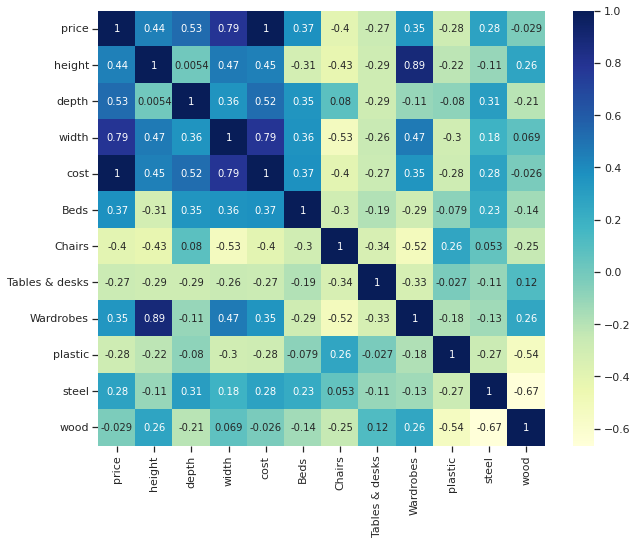

In [ ]:
#Correlation using heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
#Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train

In [ ]:
X_train.head(10)
y_train.head(10)

,height,depth,width,cost,Beds,Chairs,Tables & desks,Wardrobes,plastic,steel,wood
486,0.838710,0.275362,0.471154,0.355981,0.0,0.0,0.0,1.0,0.0,0.0,1.0
69,0.358423,0.458937,0.490385,0.384033,1.0,0.0,0.0,0.0,0.0,1.0,0.0
436,0.681004,0.227053,0.278846,0.158384,0.0,0.0,0.0,1.0,0.0,0.0,1.0
527,0.767025,0.251208,0.387019,0.149655,0.0,0.0,0.0,1.0,0.0,1.0,0.0
587,0.838710,0.265700,0.350962,0.241032,0.0,0.0,0.0,1.0,0.0,0.0,1.0
428,0.838710,0.275362,0.230769,0.083581,0.0,0.0,0.0,1.0,0.0,0.0,1.0
29,0.304659,0.468599,0.331731,0.149958,1.0,0.0,0.0,0.0,0.0,1.0,0.0
124,0.286738,0.338164,0.180288,0.061619,0.0,1.0,0.0,0.0,0.0,0.0,1.0
155,0.333333,0.439614,0.153846,0.056728,0.0,1.0,0.0,0.0,0.0,0.0,1.0
584,0.838710,0.304348,0.350962,0.314099,0.0,0.0,0.0,1.0,0.0,0.0,1.0


486    0.384856
69     0.420888
436    0.160313
527    0.157493
587    0.260574
428    0.090339
29     0.149869
124    0.069452
155    0.061305
584    0.318016
Name: price, dtype: float64

In [ ]:
y_test = df_test.pop('price')
X_test = df_test

In [ ]:
X_test.head(10)
y_test.head(10)

,height,depth,width,cost,Beds,Chairs,Tables & desks,Wardrobes,plastic,steel,wood
31,0.146953,0.178744,0.329327,0.302423,1.0,0.0,0.0,0.0,0.0,1.0,0.0
552,0.838710,0.275362,0.471154,0.404847,0.0,0.0,0.0,1.0,0.0,0.0,1.0
487,0.838710,0.304348,0.350962,0.318703,0.0,0.0,0.0,1.0,0.0,0.0,1.0
133,0.039427,0.101449,0.079327,0.000470,0.0,1.0,0.0,0.0,1.0,0.0,0.0
103,0.272401,0.318841,0.180288,0.050993,0.0,1.0,0.0,0.0,0.0,0.0,1.0
586,0.767025,0.251208,0.483173,0.175659,0.0,0.0,0.0,1.0,0.0,1.0,0.0
106,0.336918,0.227053,0.105769,0.019062,0.0,1.0,0.0,0.0,0.0,0.0,1.0
547,0.838710,0.198068,0.471154,0.294199,0.0,0.0,0.0,1.0,0.0,0.0,1.0
252,0.268817,0.227053,0.108173,0.076859,0.0,1.0,0.0,0.0,1.0,0.0,0.0
225,0.121864,0.275362,0.125000,0.002624,0.0,1.0,0.0,0.0,1.0,0.0,0.0


31     0.302350
552    0.409922
487    0.335457
133    0.000522
103    0.055875
586    0.182454
106    0.019739
547    0.309661
252    0.076762
225    0.002611
Name: price, dtype: float64

## Model Building

In [ ]:
def rmse(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

def get_model():
  model = Sequential([
    Dense(512, activation='relu', input_shape=[len(X_train.keys())]),
    Dropout(0.3),
    Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.001)),
    Dropout(0.1),
    Dense(128, activation='relu'),
    Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss=rmse,
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

get_model().summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               6144      
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 170,497
Trainable params: 170,497
Non-trai

In [ ]:
callbacks = [EarlyStopping(monitor = "val_loss", patience = 15, verbose = 2)]

model = get_model()

history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 2000,
    callbacks = [callbacks]
    
)

Epoch 1/2000
15/15 [==============================] - 2s 19ms/step - loss: 0.4326 - mae: 0.1126 - mse: 0.0326 - val_loss: 0.3411 - val_mae: 0.0579 - val_mse: 0.0083
Epoch 2/2000
15/15 [==============================] - 0s 5ms/step - loss: 0.3147 - mae: 0.0594 - mse: 0.0077 - val_loss: 0.2776 - val_mae: 0.0475 - val_mse: 0.0052
Epoch 3/2000
15/15 [==============================] - 0s 5ms/step - loss: 0.2633 - mae: 0.0530 - mse: 0.0061 - val_loss: 0.2343 - val_mae: 0.0415 - val_mse: 0.0044
Epoch 4/2000
15/15 [==============================] - 0s 5ms/step - loss: 0.2260 - mae: 0.0535 - mse: 0.0054 - val_loss: 0.1948 - val_mae: 0.0382 - val_mse: 0.0031
Epoch 5/2000
15/15 [==============================] - 0s 6ms/step - loss: 0.1901 - mae: 0.0445 - mse: 0.0040 - val_loss: 0.2114 - val_mae: 0.0722 - val_mse: 0.0092
Epoch 6/2000
15/15 [==============================] - 0s 6ms/step - loss: 0.1658 - mae: 0.0426 - mse: 0.0038 - val_loss: 0.1625 - val_mae: 0.0523 - val_mse: 0.0044
Epoch 7/2000
15

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
73,0.028464,0.018856,0.000663,0.031653,0.021412,0.000827,73
74,0.026628,0.017074,0.000590,0.025410,0.016647,0.000510,74
75,0.025670,0.016905,0.000548,0.025350,0.017054,0.000503,75
76,0.030069,0.018234,0.000827,0.019298,0.013792,0.000275,76
77,0.025633,0.016915,0.000535,0.019353,0.012423,0.000299,77


## Plot Training and Validation Loss

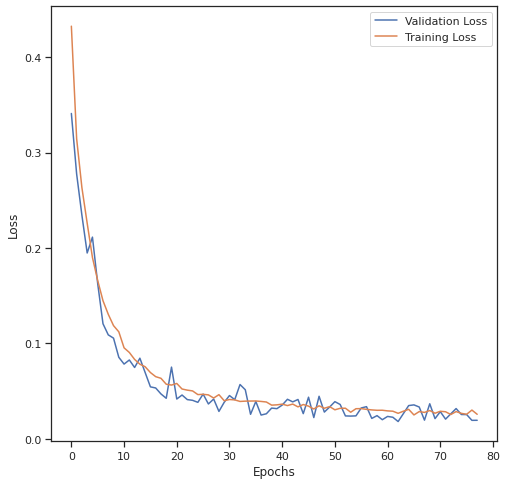

In [ ]:
def plot_loss(history):
    h = history.history
    x_lim = len(h['loss'])
    plt.figure(figsize=(8, 8))
    plt.plot(range(x_lim), h['val_loss'], label = 'Validation Loss')
    plt.plot(range(x_lim), h['loss'], label = 'Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    return

plot_loss(history)

## Predict

In [ ]:
predictions = model.predict(X_test)

In [ ]:
print(predictions)

[[0.2973079 ]
 [0.40413597]
 [0.32425466]
 [0.0093201 ]
 [0.07028049]
 [0.19191721]
 [0.0314805 ]
 [0.30849808]
 [0.07446525]
 [0.01823268]
 [0.04786635]
 [0.06483936]
 [0.02770896]
 [0.04947513]
 [0.10993586]
 [0.01040982]
 [0.13386494]
 [0.0443993 ]
 [0.03241104]
 [0.14134696]
 [0.53991246]
 [0.02996769]
 [0.2297079 ]
 [0.14008644]
 [0.06648737]
 [0.0408654 ]
 [0.02808035]
 [0.21303096]
 [0.09211693]
 [0.02320724]
 [0.15588322]
 [0.01460489]
 [0.08081847]
 [0.01931571]
 [0.12235523]
 [0.02446591]
 [0.05688379]
 [0.0257004 ]
 [0.02582839]
 [0.16442493]
 [0.19835907]
 [0.07749779]
 [0.2961976 ]
 [0.03372672]
 [0.2552958 ]
 [0.25745767]
 [0.10531787]
 [0.1732809 ]
 [0.06945717]
 [0.04972648]
 [0.03902037]
 [0.3092366 ]
 [0.19049636]
 [0.2915249 ]
 [0.07924613]
 [0.03460157]
 [0.03329577]
 [0.18238035]
 [0.1837554 ]
 [0.37483662]
 [0.01831888]
 [0.05882527]
 [0.5936065 ]
 [0.3876962 ]
 [0.39591944]
 [0.02015482]
 [0.08170949]
 [0.02794434]
 [0.10145106]
 [0.13621515]
 [0.0666512 ]
 [0.06

In [ ]:
example_batch = X_train[:5]
example_batch

,height,depth,width,cost,Beds,Chairs,Tables & desks,Wardrobes,plastic,steel,wood
486,0.838710,0.275362,0.471154,0.355981,0.0,0.0,0.0,1.0,0.0,0.0,1.0
69,0.358423,0.458937,0.490385,0.384033,1.0,0.0,0.0,0.0,0.0,1.0,0.0
436,0.681004,0.227053,0.278846,0.158384,0.0,0.0,0.0,1.0,0.0,0.0,1.0
527,0.767025,0.251208,0.387019,0.149655,0.0,0.0,0.0,1.0,0.0,1.0,0.0
587,0.838710,0.265700,0.350962,0.241032,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
X_test.head(15)

,height,depth,width,cost,Beds,Chairs,Tables & desks,Wardrobes,plastic,steel,wood
31,0.146953,0.178744,0.329327,0.302423,1.0,0.0,0.0,0.0,0.0,1.0,0.0
552,0.838710,0.275362,0.471154,0.404847,0.0,0.0,0.0,1.0,0.0,0.0,1.0
487,0.838710,0.304348,0.350962,0.318703,0.0,0.0,0.0,1.0,0.0,0.0,1.0
133,0.039427,0.101449,0.079327,0.000470,0.0,1.0,0.0,0.0,1.0,0.0,0.0
103,0.272401,0.318841,0.180288,0.050993,0.0,1.0,0.0,0.0,0.0,0.0,1.0
586,0.767025,0.251208,0.483173,0.175659,0.0,0.0,0.0,1.0,0.0,1.0,0.0
106,0.336918,0.227053,0.105769,0.019062,0.0,1.0,0.0,0.0,0.0,0.0,1.0
547,0.838710,0.198068,0.471154,0.294199,0.0,0.0,0.0,1.0,0.0,0.0,1.0
252,0.268817,0.227053,0.108173,0.076859,0.0,1.0,0.0,0.0,1.0,0.0,0.0
225,0.121864,0.275362,0.125000,0.002624,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
X_test[8:9].values

array([[0.2688172 , 0.22705314, 0.10817308, 0.07685881, 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]])

In [ ]:
example_batch = X_test[8:9]
example_batch

example_test = y_test[8:9]
example_test

,height,depth,width,cost,Beds,Chairs,Tables & desks,Wardrobes,plastic,steel,wood
252,0.268817,0.227053,0.108173,0.076859,0.0,1.0,0.0,0.0,1.0,0.0,0.0


252    0.076762
Name: price, dtype: float64

In [ ]:
example_result = model.predict(example_batch)
print(example_result)

[[0.07446526]]


Text(0.5, 0, 'True Values')

Text(0, 0.5, 'Predictions')

(0.0, 0.5)

(0.0, 0.5)

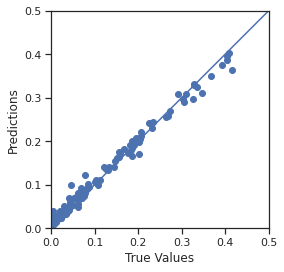

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 0.5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.show()

## Export Model

In [ ]:
model_json = model.to_json()

# save json
with open("model_repfit_v1.json", "w") as json_file:
    json_file.write(model_json)

# save model
model.save("model_repfit_v1.h5")

# save model weight
model.save_weights("model_repfit_weight_v1.h5")

2365